<a href="https://colab.research.google.com/github/kazuhir2/ORseminar/blob/master/2019_0518_DP_Knapsack_Network_Kobayashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019年度第1回ＯＲセミナー　5月18日

## 「ネットワークと動的最適化」

## 小林和博（青山学院大学理工学部←東京理科大学）


# NetworkX

>NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex network .

複雑ネットワークに対する様々な操作や解析を可能にするPythonパッケージ

 * ソーシャルなつながり，生命現象，インフラネットワークの解析などに使われる．
 * 様々な応用で利用可能な，グラフ操作の標準的なインターフェースが提供されている．
 * 既存の数値演算アルゴリズム（C, C++, FORTRANなどで書かれたもの）とのインターフェースが提供されている．

## グラフ生成

* グラフは，ノードの集合とノードのペアの集合（枝，ラインなどと呼ばれる）で定義される．

 * いつも可視化できるとは限らない．
 
* Networkxでは，ノードはハッシュ可能なオブジェクトであればなんでもよい．
  * そのオブジェクトが存在している間，ハッシュ値の変化しない
  * 文字列でも，行列でも，画像でも，XML objectでも，グラフでも，線形計画問題でも，なんでもよい．
  
  
 ## ノード
 
 Networkxには，多様なグラフ生成処理が用意されている．
 
 一番単純なものは，ノードを1つずつ追加するもの．
 
 

In [0]:
import networkx as nx
G=nx.Graph()

In [2]:
G.add_node(1)
print(G.nodes())

[1]


ノードは，ノードのリストで追加することもできる．

In [3]:
G.add_nodes_from([2,3])
print(G.nodes())

[1, 2, 3]


ノードとして表されるオブジェクトは，互いに異なっていてもよい．

In [4]:
G.add_nodes_from(['abc',(10,20,30)])
print(G.nodes())

[1, 2, 3, 'abc', (10, 20, 30)]


タプルはハッシュ可能なのでノードとなることはできるが，リストはハッシュ可能ではないので，ノードとなることはできない．

In [5]:
G.add_node([10,20,30])
print(G.nodes())

TypeError: ignored

## エッジ

エッジは，ノードと同様に，1つずつ追加することもできるし，複数を同時に追加することもできる．



In [6]:
G=nx.Graph()
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)
G.add_edge(2,3)
print(G.nodes())
print(G.edges())

[1, 2, 3]
[(1, 2), (2, 3)]


add_edge()の引数には，2つの端点を与える．エッジは，多くの応用であるペアのつながりを表しており，それはタプルとして保持されていることが多い．このタプルからエッジを定義する場合は，add_edge()の引数にそのままタプルを与えても動作しないので，その場合はタプルをアンパックしたものを与える．タプルeをアンパックするためには，*eとする．ここでは，add_edge(*e)は，add_edge(e[0],e[1])と同じ機能がある．

ここで注意してもらいたいのは，追加しようとするエッジの両端のノードが，いまだにそのグラフのノードとして含まれていない場合，同時に追加してしまう，ということである。上の例では，Gを生成した直後にadd_edge(1,2)を実行している．ノード1,2はいまだに存在しないが，このエッジを追加する際に同時にノード1,2も追加する．この仕様は便利ではあるけれども注意を要する．

エッジをリストからまとめて追加する場合は，次のようにadd_edges_from()を用いる． 

In [7]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
print(G.edges())


[(1, 2), (1, 3)]


add_edges_from()の引数には，エッジを表すタプルのリストを指定するが，この場合はそれぞれのエッジを表す要素はタプルのままでよい．

## グラフの情報取得

グラフの情報を得るための関数が複数用意されている．例えば，ノード数，エッジ数を得るには，次のようにすればよい．



In [8]:
print(G.number_of_nodes())
print(G.number_of_edges())

3
2


ノードの一覧，エッジの一覧を得るには，G.nodes, G.edgesを用いる．
一つのノードiに隣接するエッジは，G.adj[i]で得られる．現在のグラフGにおいて，ノード1を端点とするエッジは(1,2), (1,3)であるので，次の命令によって，[2,3]が得られる．

In [9]:
G.nodes
list(G.adj[1])

[2, 3]

## ノードの属性(Attribute)

add_node(), add_nodes_from()およびG.nodesを用いて，ノードに属性を付加することができる．



In [10]:
G.add_node(1,time='5pm')
G.add_nodes_from([3],time='2pm')
G.nodes[1]['room']=714
print(G.nodes[1], G.nodes[3])
print(type(G.nodes[1]))


{'time': '5pm', 'room': 714} {'time': '2pm'}
<class 'dict'>


ノード1の属性は，辞書であることがわかる．だから，G.nodes[1]を辞書として扱って，キーと値を与えることによってノート1の属性を持たせることができる．上の例では，キー'room'に対する値714を与えている．

##  エッジの属性

ノードと同様に，エッジにも属性を持たせることができる．



In [11]:
G.add_edge(1,2,weight=4.7)
G.add_edges_from([(3,4), (4,5)],color='red') #(3,4), (4,5)の両方に，属性colorとしてredを持たせる．
print(G.edges[1,2])
print(G.edges[3,4], G.edges[4,5])

{'weight': 4.7}
{'color': 'red'} {'color': 'red'}


ただし，属性weightは特別である．weightは，値が数値でなくてはならず，この値はグラフ上のアルゴリズム（最短路問題など）の実行の際に用いられる．エッジの費用として用いる属性は，アルゴリズムの実行時に指定できる．例えば，最短路問題を求める関数shortest_path()の実行時，weight=としてエッジの属性を指定すると，その属性をコストとみなした最短路を求める．weightを指定しないと，エッジのコストを全て1とみなして最短路を求める．

['b', 'c', 'd']
['b', 'a', 'c', 'd']


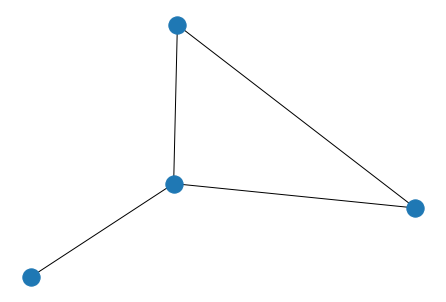

In [12]:
G=nx.Graph()
G.add_edge('a','b',weight=0.1)
G.add_edge('b','c',weight=1.5)
G.add_edge('a','c',weight=1.0)
G.add_edge('c','d',weight=2.2)
nx.draw(G)
print(nx.shortest_path(G,'b','d'))
print(nx.shortest_path(G,'b','d',weight='weight'))

## グラフの読み書き

グラフは，ファイルに書き出したりファイルから読み込んだりできる．




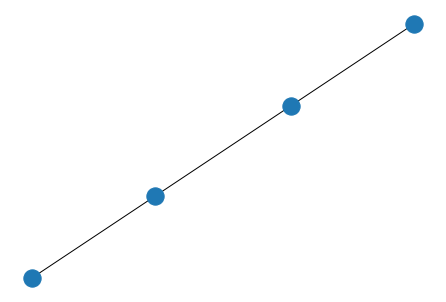

In [13]:
nx.draw(nx.path_graph(4))
nx.write_edgelist(nx.path_graph(4),"test.edgelist")
from google.colab import files
files.download("test.edgelist")


このwrite_edgelist()により，上に示したノード数4，エッジ数3のグラフがファイルtest.edgelistに書き出される．test.edgelistはテキストファイルで，内容は次のとおりである．

0 1 {}

1 2 {}

2 3 {}

test.edgelistを読み込んで，NetworkXのグラフにするには，read_edgelist()を実行すればよい．

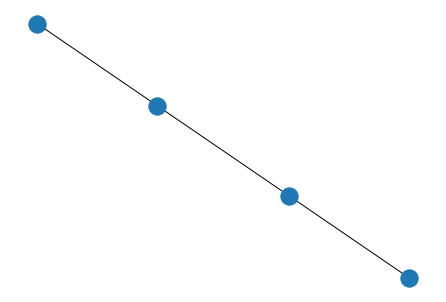

In [14]:
G=nx.read_edgelist("test.edgelist")
nx.draw(G)

ノード数とエッジ数が多い場合，または他所から提供されたグラフデータを用いる場合は，この機能は重要である．例として，下記のページで提供されているfacebook_combined.txtを読み込んで，そのグラフの特性を解析してみる．


https://snap.stanford.edu/data/egonets-Facebook.html

In [16]:
G=nx.read_edgelist('facebook_combined.txt',nodetype=int)
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))


4039
88234


グラフGを表示（可視化）するには，nx.draw(G)を実行すればよい．

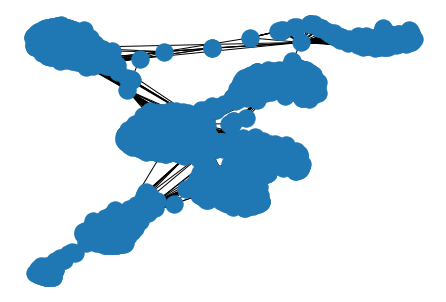

In [17]:
nx.draw(G)

ただし，ノードとエッジの数がある程度大きいグラフを単に描画しても，通常は見やすいものにはならない．見やすいものにするには，描画に際して適切な設定を行う必要があるが，簡単なことではない（実際，グラフの可視化はそれ自体が研究分野になるほどである）．networkxには，あらかじめ定められたレイアウトで描画を実行する関数が用意されているので，まずはそれらを試してみることにする．


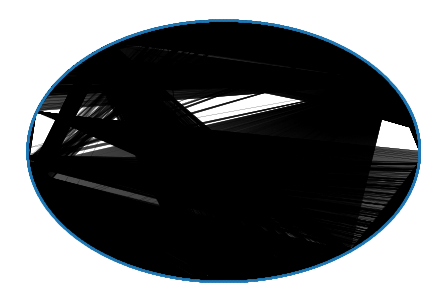

In [18]:
nx.draw_circular(G,node_size=1,width=0.2)

circularレイアウトでは見づらいので，springレイアウトでの表示を試す．spring_layout(G)によって，Gの各ノードの座標を得ることができる．これを，posとして記憶する．

In [0]:
pos=nx.spring_layout(G)

In [0]:
pos


記憶しておいたposは，drawの際に引数に指定することができる．そうすると，そのレイアウトの位置にグラフが描画される．

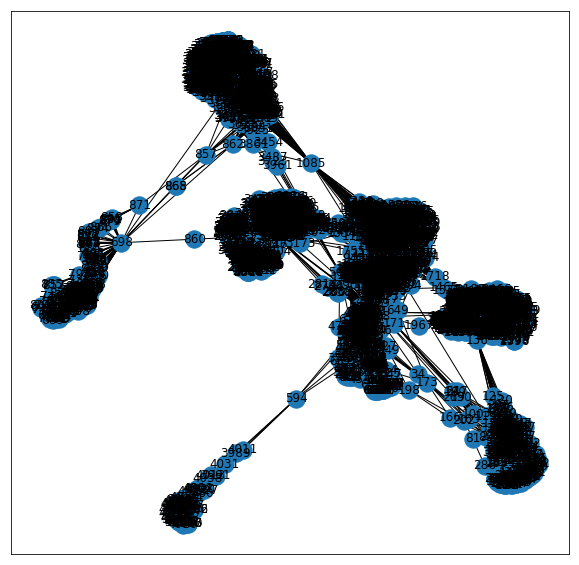

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G,pos)

グラフを見ると，ノードによって次数が異なることがわかる．そこで，多くのノードとつながっているノードを重視し，より分かりやすい表示にすることを試みる．グラフにおける各ノードの重要度をはかる指標は，「複雑ネットワーク」といわれる分野で複数提唱されている．そのなかで，**媒介中心性（Betweenness Centrality）**　とよばれる指標を用いる．グラフGの媒介中心性を求めるには，次の命令を実行する．

In [0]:
bC=nx.betweenness_centrality(G,normalized=True,endpoints=True)

こうして計算した媒介中心性をにより，各ノードの色とサイズを決定することで，みやすい表示を得ることを試みる．ひとつの試みが次のものである．

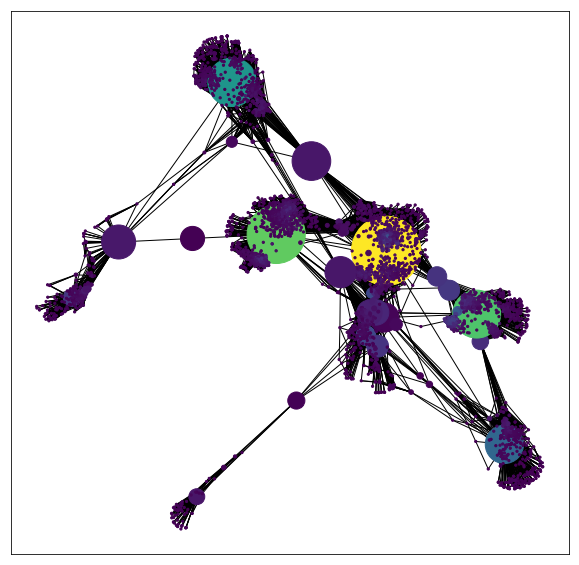

In [23]:
node_color=[20000.0*G.degree(v) for v in G]
node_size=[v*10000 for v in bC.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,with_labels=False)

# 最短路問題の整数最適化への定式化
NetworkXには，グラフ上の最適化問題を解くためのアルゴリズムが備えられている．具体的には，以下のものが利用可能である（他にもあるが，公式マニュアルを参照のこと）．

* 


## 制約つき最短路問題

最短路問題はダイクストラ法により効率的に解くことができるが，実際に使う場面では制約を課したい場面も多い．例えば，各点への訪問時刻がある範囲に定められている（時間枠制約という）場合などである．このように，制約が課された最短路問題を，制約付き最短路問題とよぶ．

制約付き最短路問題は，単純で特別な制約の場合は効率的に解くアルゴリズムが存在する場合もあるが，そうでない場合も多い．その場合は，制約付き最短路問題を整数線形最適化問題として表してしまう方法が有効である．

まずは，（制約なしの）最短路問題を整数線形最適化問題として表す方法を述べる．次に示すグラフを例として用いる．

In [0]:
sG=nx.DiGraph()
sG.add_edge(1,2,weight=2.0)
sG.add_edge(1,3,weight=4.0)
sG.add_edge(2,3,weight=1.0)
sG.add_edge(2,4,weight=4.0)
sG.add_edge(2,5,weight=2.0)
sG.add_edge(3,5,weight=3.0)
sG.add_edge(4,6,weight=2.0)
sG.add_edge(5,4,weight=3.0)
sG.add_edge(5,6,weight=2.0)
labels = nx.get_edge_attributes(sG,'weight')
pos=nx.circular_layout(sG)

[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)]


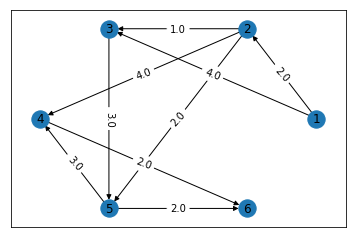

In [25]:
print(sG.edges)
nx.draw_networkx_edge_labels(sG,pos,edge_labels=labels)
nx.draw_networkx(sG,pos)

エッジ(i,j)をとおるとき１，とおらないとき0をとる0-1整数を用いると，始点1から終点6への最短路を求める問題は，次のように書くことができる．

$\min \sum_{(i,j) \in A} c_{ij} x_{ij}$

$\text{s.t.}   \ \ x_{12}+x_{13} = 1 $ 

$\qquad x_{12}-(x_{23}+x_{24}+x_{25}) = 0 $ 

$\qquad x_{13}+x_{23}-(x_{35}) = 0 $ 

$\qquad x_{24}+x_{54}-(x_{46}) = 0 $ 

$\qquad x_{25}+x_{35}-(x_{54}+x_{56}) = 0 $ 

$\qquad x_{46}+x_{56} = 1 $ 

$\qquad x_{ij} \in \{0,1\}$

制約式は，各点への流入量と流出量が釣り合っていることを課している．いま，このグラフはsGとして表されているので，このsGから整数線形最適化問題を定義することができる．

整数線形最適化問題を扱うには，PuLPを用いる．

In [26]:
!pip install pulp

     |████████████████████████████████| 13.6MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/5e/76/77/e28b22219e46e3b4b033f02e8b36b2770ae545bdcf60c2b224
Successfully built pulp


In [27]:
from pulp import *
source, sink = 1, 6 # 始点, 終点
vl={(i,j):LpVariable('x%d_%d'%(i,j),lowBound=0,upBound=1,cat='Binary') for i,j in sG.edges()}
ml=LpProblem()
ml+=lpSum(sG[i][j]['weight']*vl[i,j] for i,j in sG.edges())
for nd in sG.nodes():
  ml+=lpSum(vl[i,j] for (i,j) in sG.edges() if i==nd) \
  ==lpSum(vl[i,j] for (i,j) in sG.edges() if j==nd) + {source:1,sink:-1}.get(nd,0)
print(ml)
ml.solve()
print([(i,j) for (i,j) in sG.edges() if value(vl[i,j])>0.5 ])

NoName:
MINIMIZE
2.0*x1_2 + 4.0*x1_3 + 1.0*x2_3 + 4.0*x2_4 + 2.0*x2_5 + 3.0*x3_5 + 2.0*x4_6 + 3.0*x5_4 + 2.0*x5_6 + 0.0
SUBJECT TO
_C1: x1_2 + x1_3 = 1

_C2: - x1_2 + x2_3 + x2_4 + x2_5 = 0

_C3: - x1_3 - x2_3 + x3_5 = 0

_C4: - x2_4 + x4_6 - x5_4 = 0

_C5: - x2_5 - x3_5 + x5_4 + x5_6 = 0

_C6: - x4_6 - x5_6 = -1

VARIABLES
0 <= x1_2 <= 1 Integer
0 <= x1_3 <= 1 Integer
0 <= x2_3 <= 1 Integer
0 <= x2_4 <= 1 Integer
0 <= x2_5 <= 1 Integer
0 <= x3_5 <= 1 Integer
0 <= x4_6 <= 1 Integer
0 <= x5_4 <= 1 Integer
0 <= x5_6 <= 1 Integer

[(1, 2), (2, 5), (5, 6)]


PuLPの使い方の詳細は省略するが，NetworkXの有向グラフsGに保管されている情報から，このように最短路問題を線形最適化問題として定式化することができる．

この最短路問題に，時間枠制約をつける．時間枠制約つき最短路問題では，各エッジはコストの他に移動時間をもつ．また，訪問可能な時間枠を持つ．各エッジの移動時間は，属性timeとして表されるとする． ここでは，時間枠制約つき最短路問題の単純な例として，終点にのみ時間枠がついているものを扱う．終点にのみ時間枠がついている時間枠制約つき最短路問題は，線形最適化問題として次のように定式化される．

$\min \sum_{(i,j) \in A} c_{ij} x_{ij}$

$\text{s.t.}   \ \ x_{12}+x_{13} = 1 $ 

$\qquad x_{12}-(x_{23}+x_{24}+x_{25}) = 0 $ 

$\qquad x_{13}+x_{23}-(x_{35}) = 0 $ 

$\qquad x_{24}+x_{54}-(x_{46}) = 0 $ 

$\qquad x_{25}+x_{35}-(x_{54}+x_{56}) = 0 $ 

$\qquad x_{46}+x_{56} = 1 $ 

$\qquad \sum_{(i,j) \in A} t_{ij}x_{ij} \leq T$

$\qquad x_{ij} \in \{0,1\}$

ここで，$ t_{ij} $は，エッジ$ (i,j) $の移動時間を表し，$ T $は移動時間の上限を表している．

これをＰｕＬＰを用いてPython上で解くコードは，次の通りである．

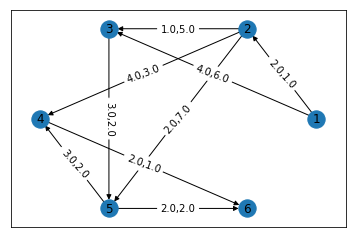

In [28]:
sG=nx.DiGraph()
sG.add_edge(1,2,weight=2.0,time=1.0)
sG.add_edge(1,3,weight=4.0,time=6.0)
sG.add_edge(2,3,weight=1.0,time=5.0)
sG.add_edge(2,4,weight=4.0,time=3.0)
sG.add_edge(2,5,weight=2.0,time=7.0)
sG.add_edge(3,5,weight=3.0,time=2.0)
sG.add_edge(4,6,weight=2.0,time=1.0)
sG.add_edge(5,4,weight=3.0,time=2.0)
sG.add_edge(5,6,weight=2.0,time=2.0)
wlabels = nx.get_edge_attributes(sG,'weight')
tlabels = nx.get_edge_attributes(sG,'time')
edge_labels={ t:str(wlabels[t])+","+str(tlabels[t]) for t in tlabels.keys()  }
pos=nx.circular_layout(sG)
nx.draw_networkx_edge_labels(sG,pos,edge_labels=edge_labels)
nx.draw_networkx(sG,pos)

In [29]:
from pulp import *
source, sink = 1, 6 # 始点, 終点
T=8
vl={(i,j):LpVariable('x%d_%d'%(i,j),lowBound=0,upBound=1,cat='Binary') for i,j in sG.edges()}
ml=LpProblem()
ml+=lpSum(sG[i][j]['weight']*vl[i,j] for i,j in sG.edges())
for nd in sG.nodes():
  ml+=lpSum(vl[i,j] for (i,j) in sG.edges() if i==nd) \
  ==lpSum(vl[i,j] for (i,j) in sG.edges() if j==nd) + {source:1,sink:-1}.get(nd,0)
ml+=lpSum(sG[i][j]['time']*vl[i,j] for i,j in sG.edges())<=T
print(ml)
ml.solve()
print([(i,j) for (i,j) in sG.edges() if value(vl[i,j])>0.5 ])

NoName:
MINIMIZE
2.0*x1_2 + 4.0*x1_3 + 1.0*x2_3 + 4.0*x2_4 + 2.0*x2_5 + 3.0*x3_5 + 2.0*x4_6 + 3.0*x5_4 + 2.0*x5_6 + 0.0
SUBJECT TO
_C1: x1_2 + x1_3 = 1

_C2: - x1_2 + x2_3 + x2_4 + x2_5 = 0

_C3: - x1_3 - x2_3 + x3_5 = 0

_C4: - x2_4 + x4_6 - x5_4 = 0

_C5: - x2_5 - x3_5 + x5_4 + x5_6 = 0

_C6: - x4_6 - x5_6 = -1

_C7: x1_2 + 6 x1_3 + 5 x2_3 + 3 x2_4 + 7 x2_5 + 2 x3_5 + x4_6 + 2 x5_4
 + 2 x5_6 <= 8

VARIABLES
0 <= x1_2 <= 1 Integer
0 <= x1_3 <= 1 Integer
0 <= x2_3 <= 1 Integer
0 <= x2_4 <= 1 Integer
0 <= x2_5 <= 1 Integer
0 <= x3_5 <= 1 Integer
0 <= x4_6 <= 1 Integer
0 <= x5_4 <= 1 Integer
0 <= x5_6 <= 1 Integer

[(1, 2), (2, 4), (4, 6)]


# 地理情報を用いた表示と情報処理

道路網などの地理情報を，ＮｅｔｗｏｒｋＸのグラフ構造として表すことができるパッケージが用意されている．これらを用いることで，実在の道路上の最短路を求めたり，描画したりすることができる．ここでは，osm-graphを用いた表示の例を挙げる．

In [30]:
!pip install osm-graph

     |████████████████████████████████| 51kB 3.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/80/83/3e/466d7d3987b7894ce1bd9fcd39ae388f6cc9f9407109796acf
  Stored in directory: /root/.cache/pip/wheels/10/53/c2/e6b6f97e7bb419193bd3aafbe38628666f0f93a1cec9dc521d
Successfully built osm-graph overpy


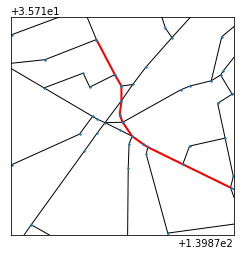

In [31]:
%matplotlib inline
import networkx as nx
from osm_graph import OsmGraph
og = OsmGraph(35.7158, 139.8741)
nd1 = og.find_node(35.7165, 139.8738)
nd2 = og.find_node(35.7153, 139.8752)
path = nx.dijkstra_path(og.graph, nd1, nd2)
g = nx.subgraph(og.graph, path)
ax = og.draw_graph()
og.draw_graph(graph=g, ax=ax, edge_color='r', width=2);

# 動的最適化

部分的な最適性の構造がある問題に対して適用できる最適化の手法である．特定の計算手法を指す言葉ではなく，計算手順を設計するための指針を指す言葉だと理解するとよい．

同じ部分問題が何度も現れる問題を解くには，一度現れた部分問題の答えを保存して再利用すればよい．これにより，計算の手間を省くことができる．

ここでは，同じ部分問題が何度も現れる計算として，フィボナッチ数の計算を取りあげる．

## フィボナッチ数

フィボナッチ数は，整数$ n $ に対して次の漸化式で定義される数である．

$ F(1)=1,F(2)=1,F(n)=F(n-1)+F(n-2)$ for $ n \geq 3 $

実際に計算すると，$ F(1)=1,F(2)=1,F(3)=2,F(4)=3,F(5)=5  $などとなることがわかる．

フィボナッチ数を求める関数は，再帰的に次のとおりに定められる:



In [0]:
def fibonacci(n):
  if n==1 or n==2: 
    return 1
  return fibonacci(n-1) + fibonacci(n-2)

この関数によりフィボナッチ数を求めるには，次のようにするとよい．

In [33]:
for i in range(1,13):
  print(fibonacci(i))

1
1
2
3
5
8
13
21
34
55
89
144


|F(1)  |F(2)|F(3) |F(4) |F(5) |F(6) |F(7) |F(8) |F(9) |F(10) |F(11) |
|---|---|---|---|---|---|---|---|---|---|---|
|1  |1  |2  |3  |5  |8  |13 |21  |34  |55  |89  |


$ n $が小さい間は問題にならないが，$ n $が大きくなると，計算時間が急速に大きくなる．その様子を観察してみる．

In [35]:
n = range(10,50,10)
print(list(n))
for i in n:
  print("fibonacci(",i,")")
  %timeit fibonacci(i)


[10, 20, 30, 40]
fibonacci( 10 )
10000 loops, best of 3: 22.4 µs per loop
fibonacci( 20 )
100 loops, best of 3: 2.74 ms per loop
fibonacci( 30 )
1 loop, best of 3: 339 ms per loop
fibonacci( 40 )


KeyboardInterrupt: ignored

fibonacci(n)では，3以上のnに対しては，fibonacci(n-1)+fibonacci(n-2)を計算している．fibonacci(n-1)はさらにfibonacci(n-2)+fibonacci(n-3)を計算している．例えば，n=7に対してこの手順を書き出してみると，次のようになる（fibonacci(n)をF(n)と表す）．

$ F\left(7\right)=F\left(6\right)+F\left(5\right)=\left(F\left(5\right)+F\left(4\right) \right)+\left(F\left(4\right)+F\left(3\right)\right) =  (F(4)+F(3)) + (F(3)+F(2))+F(3)+F(2)+F(2)+F(1)= (F(4)+F(3)) + (F(3)+1)+F(3)+1+1+1 = (F(3)+F(2)+F(2)+F(1)) + (F(3)+1)+F(3)+1+1+1 = ...$

このように，F(n)を展開する過程で，同じnに対するF(n)が繰り返し出てくる．そして，それぞれのF(n)を逐一F(n-1)+F(n-2)に展開することを繰り返している．そのため，$ n $ が大きくなるにつれて計算量が指数的に増えている．

この繰り返しを避けるためには，一度計算したF(n)の値を表に記録して再利用するとよい．それをプログラムとして実現する関数が次のfibonacci_tbl(n)である．



In [0]:
def fibonacci_tbl(n): 
  fib_table={}
  fib_table[1] = 1
  fib_table[2] = 1
  for i in range(3,n+1):
    fib_table[i] = fib_table[i-1]+fib_table[i-2] 
  return fib_table[n]


In [37]:
n = range(10,50,10)
print(list(n))
for i in n:
  print("fibonacci_tbl(",i,")")
  %timeit fibonacci_tbl(i)


[10, 20, 30, 40]
fibonacci_tbl( 10 )
The slowest run took 4.76 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.14 µs per loop
fibonacci_tbl( 20 )
100000 loops, best of 3: 4.31 µs per loop
fibonacci_tbl( 30 )
100000 loops, best of 3: 6.45 µs per loop
fibonacci_tbl( 40 )
100000 loops, best of 3: 8.48 µs per loop


この関数では，nの値が大きくなっても計算時間は穏やかにしか増えていないことが観察される．この関数では，fib_table[i]の値を計算する際に，すでに計算しているはずのfib_table[i-1]とfib_table[i-2]の値を参照している．したがって，fib_table[i]をiの小さい方から順に計算しなければ正しく動かない．

## 0-1ナップサック問題

$ n $  個のアイテムがあり，それぞれのアイテム$ i $にはその価値$ v_i $と重さ$ w_i $が与えられている．

これらのアイテムの中から，価値の総和が最大になるようにナップサックに入れるものを選びたい．ただし，入れるものの重さの和は，$ W$ を超えてはいけない．

この問題を，動的最適化を用いて解く．

$ n $個の中から選ぶ問題であるが，その中のいくつかからしか選べない問題を考える．最終的には，アイテム$ 1,2,...,n$の中から選びたいのだけれど，まずは$ 1,2,...,i$の$ i $個の中だけから選ぶときの最適な選び方を求めることにする．さらに，ナップサックの重さ制限も，本来の$ W $ではなく，それ以下の$w$に制限することにする．

重さの和が$ w(\leq W) $を超えないように， $ i $個から最適に選んだときの価値の総和を，$ V[i,w]$と表すことにする．こうすると，最終的に求めたい値は，$ V[n,W] $ であることがわかる．

ここで，$ V[i,w], V[i-1,w], V[i-1,w-w_i] $の間には，次の関係があることがわかる．

$$
V[i,w]=\max (V[i-1,w],v_i+V[i-1,w-w_i])
$$

したがって，$ i=0,1,2..., w=0,1,2,...$の順に$ V[i,w] $を計算すれば，最終的に$ V[n,W] $が得られることがわかる．

$ V[i-1,w] $は，アイテム1から$ i-1 $までの中から，重さが$ w $ 以下になる中で最適な組合せの価値である．そして，これらに加えてアイテム$ i $を選べるようにしたときの最適な値が$ V[i,w] $ である．$ i $が選べにようになったときには，最適な組合せの中に$ i $ が入るか入らないかの２通りである．$ i $が入る場合は，$ i $以外の選ばれたアイテムの重さの和は$ w - w_i $以下でなければならない．それらのアイテムの価値に$ i $の価値$ v_i $を加えたものが価値の総和になるので，

$$
v_i+V[i-1,w-w_i]
$$
となる．$ i $が最適な組合せに入らない場合は，アイテム$ 1,2...,i-1 $の中から選ぶ場合と同じであるから，

$$
V[i-1,w]
$$

である．したがって，$ V[i,w] $はこれらのうちの大きい方で定められる．


### 例題

ナップサックの重さ制限が$ W=10 $, アイテムの数が$ n=4 $である0-1ナップサック問題を取り上げる．各アイテムの価値と重さは，次に示す通りとする:

$$
v=(10,40,30,50), w=(5,4,6,3)
$$

この0-1ナップサック問題の最適値は，$ V[4,10] $であるので，この値を求めたい．

$ V[i,w] $の値を表にしたものが，次のものである．

| V[i,w]   | 0| 1 | 2 |3 |4 |5 |6 |7 |8 |9 |10|
|----|----|----|----|----|----|----|----|----|----|----|----| 
|  i=0  | 0 |0 |0 |0 |0 |0 |0 |0 |0 |0 |0 |
| i=1   |  0 |0 |0 |0 |0 |10 |10 |10 |10 |10 |10 |
|  i=2  | 0 |0 |0 |0 |40 |40 |40 |40 |40 |50 |50 |
|  i=3  | 0 |0 |0 |0 |40 |40 |40 |40 |40 |50 |50 |
|  i=4  |  0 |0 |0 |50 |50 |50 |50 |90 |90 |90 |90 |

